In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
banks = ['zenit', 'stnd', 'dom', 'loko', 'msk', 'mts', 'raif', 'rnkb', 'ros', 'gos', 'ural']
files = [f'{bank}.xlsx' for bank in banks]

special_bank = 'PSB'
special_files = {
    'September': f'{special_bank}_september.xlsx',
    'October': f'{special_bank}_october.xlsx',
    'November': f'{special_bank}_november.xlsx',
    'December': f'{special_bank}_december.xlsx'
}

In [6]:
data = {}

for bank, file in zip(banks, files):
    df = pd.read_excel(file, skiprows=5)
    data[bank] = df

special_bank_data = pd.DataFrame()
for month, file in special_files.items():
    monthly_data = pd.read_excel(file)
    special_bank_data = pd.concat([special_bank_data, monthly_data])

In [16]:
data[special_bank] = special_bank_data

def get_top_3_by_month(df):
    try:
        df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')
    except Exception as e:
        print(f"Error parsing dates for {bank}: {e}")
        
    df['Месяц'] = df['Дата'].dt.month
    df['Год'] = df['Дата'].dt.year
    
    top_3_per_month = {}
    
    for month, group in df.groupby('Месяц'):
        top_3 = group.nlargest(3, 'СМ Индекс')
        top_3_per_month[month] = top_3
    
    return top_3_per_month

result = {}

In [22]:
for bank, df in data.items():
    result[bank] = get_top_3_by_month(df)

output = []
all_data = []

months = {9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}


In [23]:
for bank, monthly_data in result.items():
    for month, top_3 in monthly_data.items():
        month_name = months.get(month, 'Другой')
        output.append(f"{month_name}\n")
        output.append(f"{bank}:\n")
        for idx, row in top_3.iterrows():
            output.append(f"- Публикация {idx + 1}   Сообщение: {row['Сообщение']}  Ссылка: {row['Ссылка']}  СМ Индекс: {row['СМ Индекс']}\n")
            all_data.append((month_name, bank, row['Сообщение'], row['Ссылка'], row['СМ Индекс']))
            
output_text = "\n".join(output)
print(output_text)

output_df = pd.DataFrame(all_data, columns=['Месяц', 'Банк', 'Сообщение', 'Ссылка', 'СМ Индекс'])
output_df.to_excel('top_publications.xlsx', index=False)

Сентябрь

zenit:

- Публикация 3197   Сообщение: ​Банк «Зенит» отменил все ранее бесплатные карточные тарифы и ввёл плату 199 руб в месяц. @banksta  Ссылка: https://telegram.me/banksta/41567  СМ Индекс: 491.0

- Публикация 2877   Сообщение: ОПТИМИЗАЦИЯ: таджикистан, кыргызстан, граница, новости, узбекистан, новости таджикистан, россия, точикистон, конфликт, новости узбекистана сегодня, новости таджикистана сегодня, настоящее время, киргизия таджикистан война, рбк тв, рбк ру, 11 апреля ташкент москва, когда россия откроет границу с таджикистаном 2021, хабари имруза точикистон, таджикистан и россия, авиасообщения с россией 2021, когда россия откроет границу с узбекистаном 2021, рбк актуальное на сегодня, открытие граница россия с узбекистаном и таджикистано в 2021, рбк главные новости, тв рбк ру, рбк онлайн, рбк что случилось за день, рбк ютуб, рбк, рбк новости онлайн, таджикистан сегодня, новости кыргызстана, новости таджикистана, рбк новости, азия, рбк главное, сегодня новости для мигр

In [32]:
visualization_data = []

for bank, monthly_data in result.items():
    for month, top_3 in monthly_data.items():
        for idx, row in top_3.iterrows():
            month_name = months.get(month, 'Другой')
            visualization_data.append((month_name, bank, row['СМ Индекс'], f"Публикация {idx + 1}"))

viz_df = pd.DataFrame(visualization_data, columns=['Месяц', 'Банк', 'СМ Индекс', 'Публикация'])

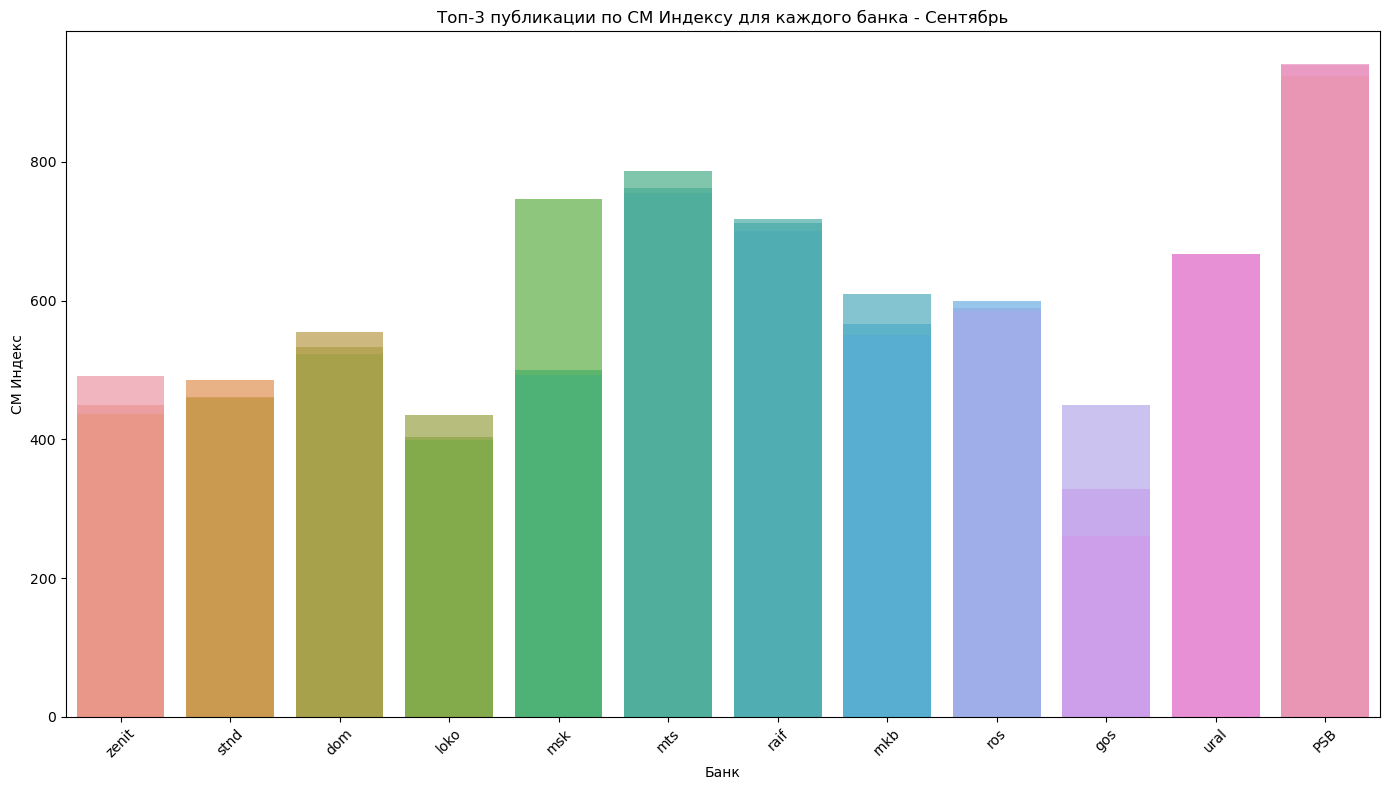

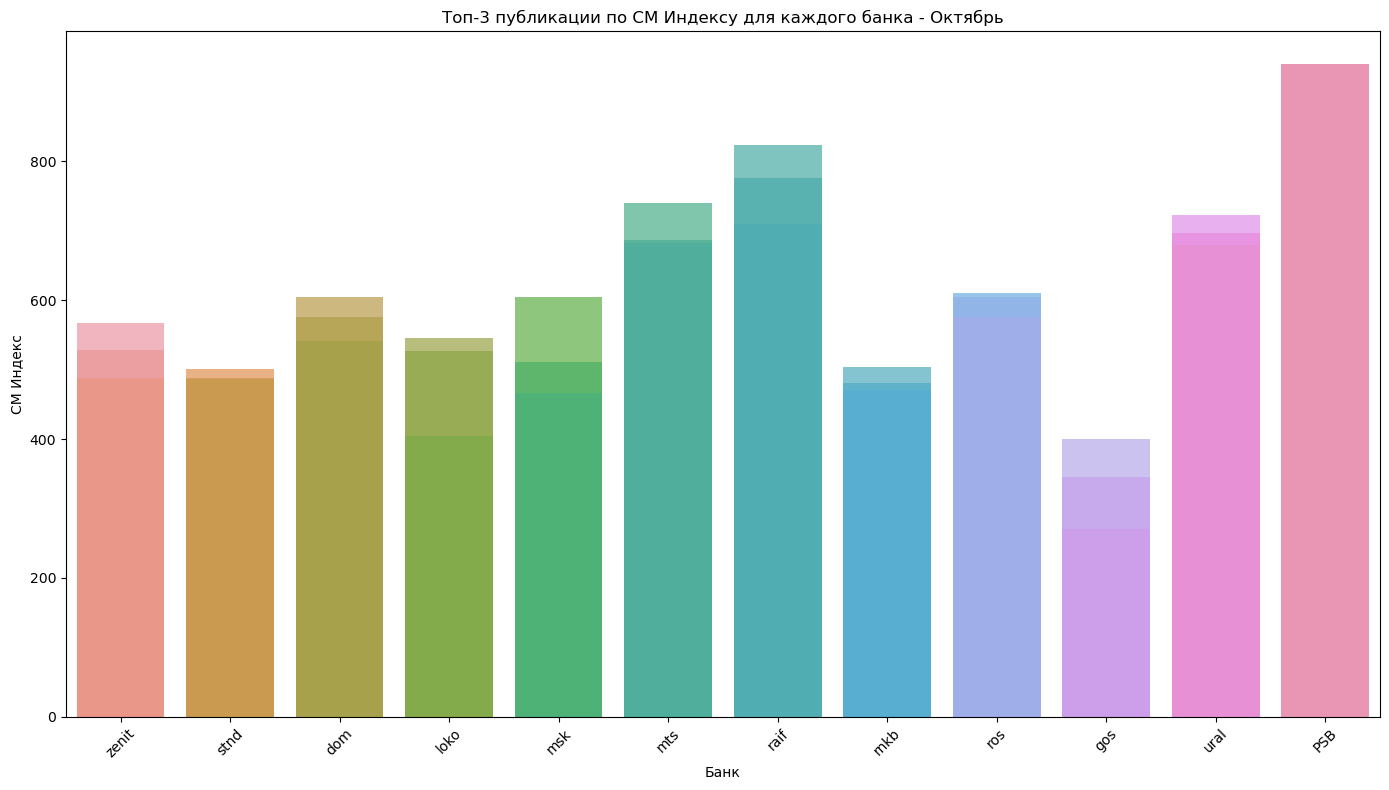

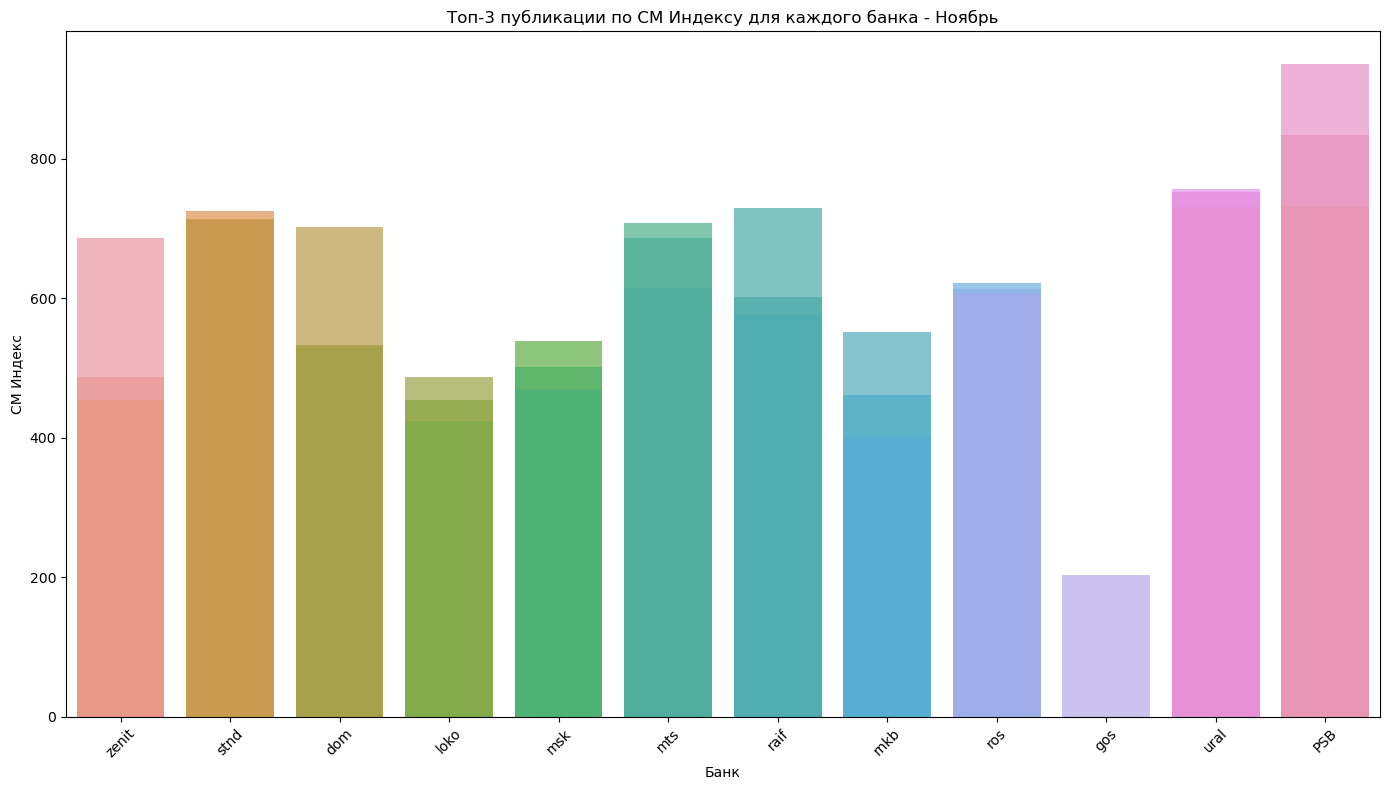

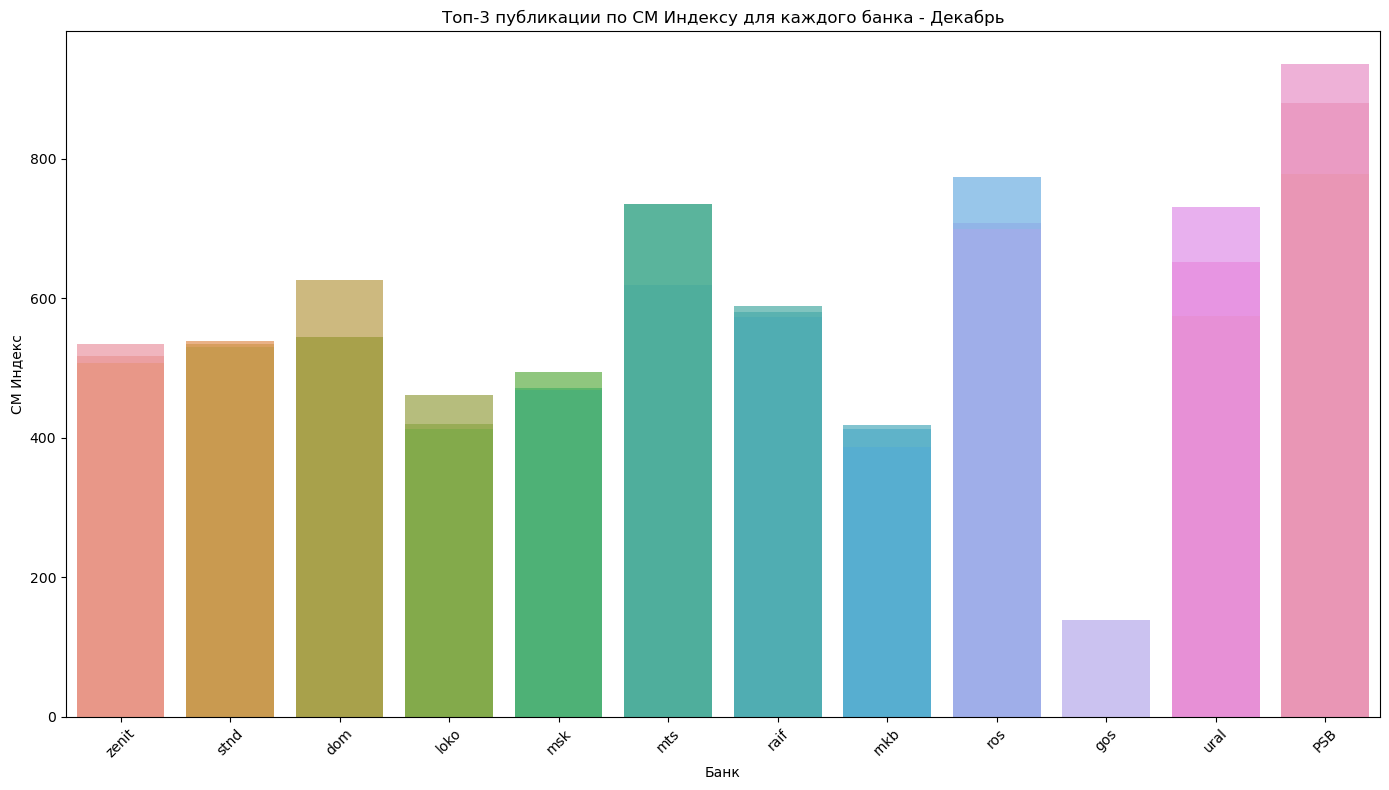

In [33]:
for month_name in months.values():
    plt.figure(figsize=(14, 8))
    month_data = viz_df[viz_df['Месяц'] == month_name]
    sns.barplot(data=month_data, x='Банк', y='СМ Индекс', hue='Публикация', dodge=False, alpha=0.7)
    plt.title(f'Топ-3 публикации по СМ Индексу для каждого банка - {month_name}')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)
    plt.tight_layout()
    plt.show()

In [34]:
def get_top_5(df):
    return df.nlargest(5, 'СМ Индекс')

result = {}

for bank, df in data.items():
    result[bank] = get_top_5(df)

output = []
all_data = []

for bank, top_5 in result.items():
    output.append(f"{bank}:\n")
    for idx, row in top_5.iterrows():
        output.append(f"- Публикация {idx + 1}   Сообщение: {row['Сообщение']}  Ссылка: {row['Ссылка']}  СМ Индекс: {row['СМ Индекс']}\n")
        all_data.append((bank, row['Сообщение'], row['Ссылка'], row['СМ Индекс']))

output_text = "\n".join(output)
print(output_text)

output_df = pd.DataFrame(all_data, columns=['Банк', 'Сообщение', 'Ссылка', 'СМ Индекс'])
output_df.to_excel('top_5_publications.xlsx', index=False)


zenit:

- Публикация 1582   Сообщение: Северное сияние в Новосибирске в ночь на понедельник  Ссылка: https://telegram.me/rian_ru/220615  СМ Индекс: 686.0

- Публикация 1935   Сообщение: 🇷🇺 Доллар опустится до 85-90 рублей в первом квартале 2024 года, считает эксперт.
Юань закрепится на уровне 12,3 рублей. Это хорошие условия для покупки валют на более долгосрочную перспективу, рассказал РИА Новости аналитик банка "Зенит".
В ближайшие месяцы рубль перестанет ослабевать из-за жесткой политики ЦБ и мер поддержки властей. Основная волна девальвации рубля подошла к завершению.
Твердо и четко
❓БУДЕТ БАКС ПО 85? - ДА - 👍 / НЕТ - 👎
👉 FTT - подписаться  Ссылка: https://telegram.me/c/1292964247/239313  СМ Индекс: 567.0

- Публикация 876   Сообщение: Собчачка меня персонально мочит ☝ Ну то есть если кто совсем в танке и не понял, что это скоординированная кампания ➡️ собчачка ничего без 💰 и команды делать не будет https://t.co/lvje7LwXN1  Ссылка: http://twitter.com/v_milov/status/1731057833175646

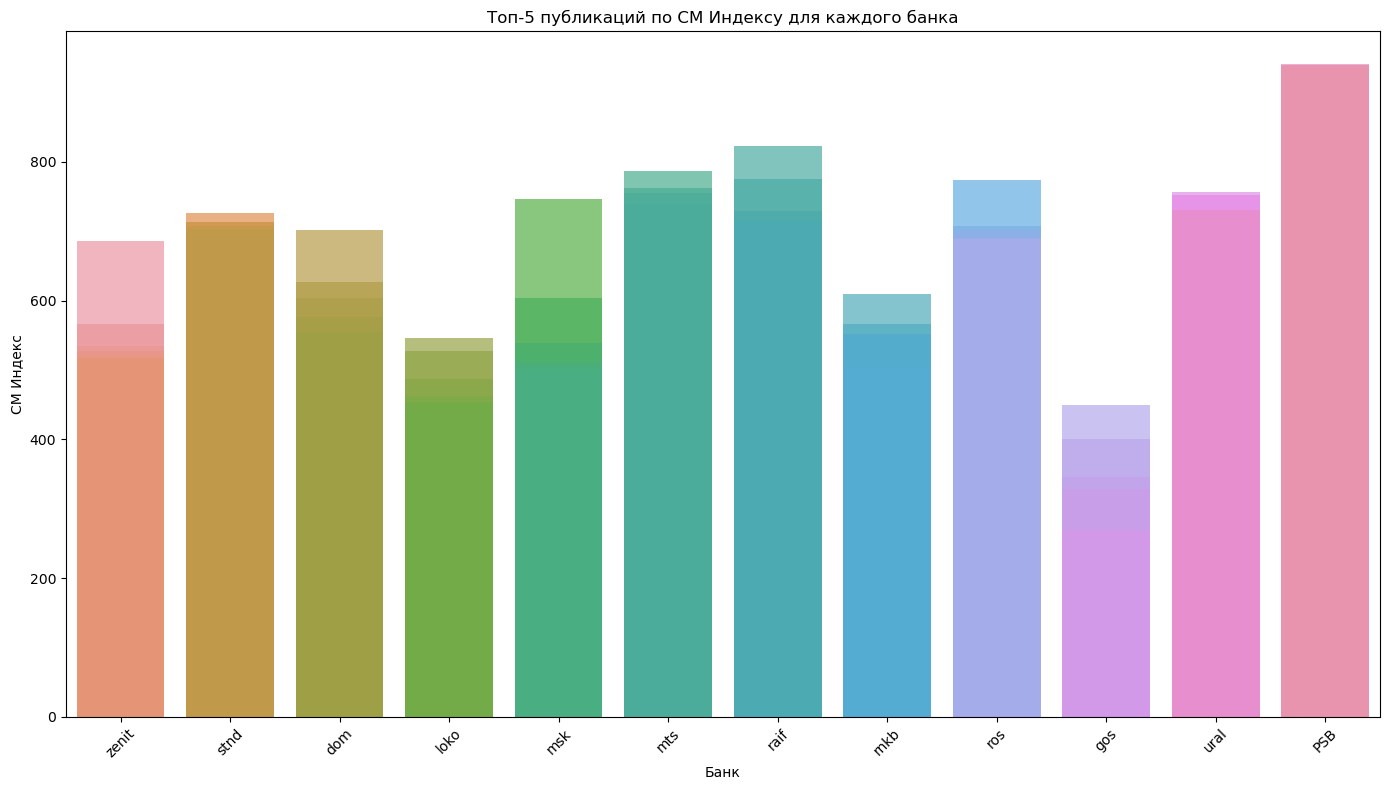

In [35]:
visualization_data = []

for bank, top_5 in result.items():
    for idx, row in top_5.iterrows():
        visualization_data.append((bank, row['СМ Индекс'], f"Публикация {idx + 1}"))

viz_df = pd.DataFrame(visualization_data, columns=['Банк', 'СМ Индекс', 'Публикация'])

plt.figure(figsize=(14, 8))
sns.barplot(data=viz_df, x='Банк', y='СМ Индекс', hue='Публикация', dodge=False, alpha=0.7)
plt.title('Топ-5 публикаций по СМ Индексу для каждого банка')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False) 
plt.tight_layout()
plt.show()